[TransientLATSources Paper](https://iopscience.iop.org/article/10.3847/1538-4365/ac072a)

Imageset download is in resources.

Terminal lifetime $\tau$.

Initial observation value $t_1$; final observation value $t_2$.

$$F_{1,2} = A\times t_{1,2}^{\gamma} = (\tau - t_{1,2})^{-index}$$

$$log(F) = \gamma(log(A) + log(t)) \to F_1,F_2$$ 

$$log(\frac{F_2}{F_1}) = \gamma log(\frac{t_2}{t_1})$$

$$\gamma = \frac{log(\frac{F_2}{F_1})}{log(\frac{t_2}{t_1})}$$

$$\gamma = -index \times \frac{log\left[\frac{\tau - t_2}{\tau - t_1}\right]}{log\left[\frac{t_2}{t_1}\right]}$$

For some observation interval dt = $t_2 - t_1$: $\gamma = -index \times \frac{log\left[\frac{\tau - (t+dt)}{\tau - t}\right]}{log\left[\frac{t+dt}{t}\right]}$

/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


Text(0, 0.5, 'Corresponding observed $\\gamma$')

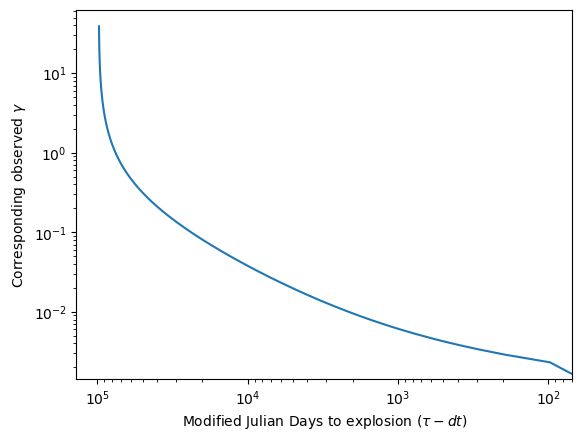

In [2]:
import matplotlib.pyplot as plt
import numpy as np

tau = 1e5
dt = 5.75e4 - 5.5e4

gamma = lambda t, tau, dt, index=-.3: index * np.log((tau - (t+dt)) / (tau - t)) / np.log((t + dt) / t)

t = np.linspace(0, 0.999*(tau-dt), 1_000)

fig, ax = plt.subplots()
ax.loglog(t, gamma(t, tau, dt))

ax.set_xscale('log')
ax.set_yscale('log')
lims = ax.get_xlim()
ax.set_xlim(lims[1], lims[0])

ax.set_xlabel(r'Modified Julian Days to explosion ($\tau - dt$)')
ax.set_ylabel(r'Corresponding observed $\gamma$')

Effect of proper motion

We want proportion of incident (reaching Earth flux wrt distances $d_1, d_2$).
$$\phi_{1,2} = \frac{\Phi_{1,2}}{4\pi d_{1,2}^2}$$

$d_2$ is defined by time $t = t_2 - t_1$ and velocity $v$ ~ 200-300km/s (galactic dispersion).

$$\frac{\phi_2}{\phi_1} = \frac{\Phi_2}{\Phi_1}\frac{4\pi d_1^2}{4\pi d_2^2}$$

$\frac{\Phi_2}{\Phi_1} ~> 1$ but is more accurately $\frac{\Phi_2}{\Phi_1} = \left[\frac{\tau - t_1}{\tau - t_2}\right]^{-1/3}$.

Subbing $d_2 = d_1 + v(t_2 - t_1)$ and $t_2 = t + t_1$:

$$\frac{\phi_2}{\phi_1} = \left[\frac{\tau - t_1}{\tau - t - t_1}\right]^{-1/3} \cdot \left[\frac{d_1}{d_1 + vt}\right]^2$$

Of course, we are contemplating $t =$ 8 years and $\tau>$ 30 years, so we can 

$$\frac{\partial }{\partial t}\frac{\phi_2}{\phi_1} = \frac{d_1^2 * \left( 5vt - 6v(\tau - t_1) - d_1\right)}{ 3(\tau - t_1)^{1/3} (\tau - t - t_1)^{2/3} (vt + d_1)^3 }$$

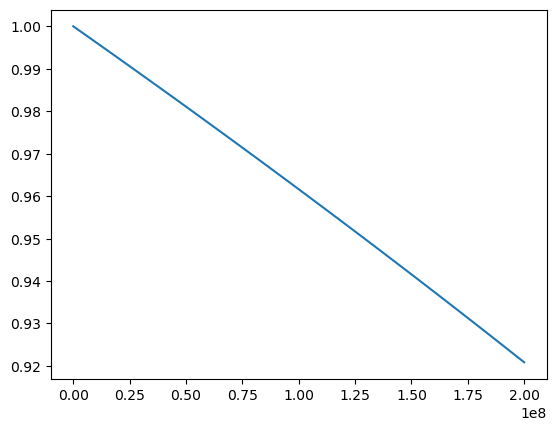

In [36]:
fig, ax = plt.subplots()

# \tau in s
# t1 in s
# d1 in km
# v in km/s

def flux_ratio(t, tau=1e9, t1=1e7, d1=1e13, v=200, index=.33):
    return ( 
        ((tau - t1)/(tau - t - t1))**(-index) *\
        (d1/(d1 + v*t))**2
    )

t = np.linspace(1, 2e8)
# v = np.linspace(100, 300)

# X,Y = np.meshgrid(t,v)

# Z = [flux_ratio(t=t, v=v) for t in np.linspace(1, 2e8) for v in np.linspace(100, 300)]
# Z = np.array(Z).reshape(50,50)

# ax.contour([X,Y], Z)

ax.plot(t, flux_ratio(t))